In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
#pd.set_option('display.max_rows', 1000)

### Data Processing

In [75]:
# Create dataframe from CSV
# parse_dates argument automatically converts data to datetime64

df_main = pd.read_csv(os.path.abspath('amazon_purchases.csv'), parse_dates=['Order Date', 'Shipment Date'])
df_main

,Order ID,Order Date,Category,Website,Condition,Seller,List Price Per Unit,Purchase Price Per Unit,Quantity,Shipment Date,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total
0,1,2008-02-19,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$29.99,$19.79,1,2008-02-25,USPS,$19.79,$0.00,$19.79
1,2,2008-02-19,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$27.95,$18.45,1,2008-02-25,USPS,$18.45,$0.00,$18.45
2,3,2008-06-03,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$34.99,$23.09,1,2008-06-04,UPS,$23.09,$0.00,$23.09
3,4,2008-11-06,BEAUTY,Amazon.com,NaN,SimplyBeautiful,$6.99,$9.39,1,2008-11-07,USPS,$9.39,$0.00,$9.39
4,5,2008-11-06,HAIR_STYLING_AGENT,Amazon.com,NaN,SimplyBeautiful,$10.99,$7.99,1,2008-11-07,USPS,$7.99,$0.00,$7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,974,2019-12-24,HEALTH_PERSONAL_CARE,Amazon.com,new,Amazon.com,$24.99,$13.59,2,2019-12-26,AMZN_US,$27.18,$0.00,$27.18
974,975,2019-12-27,BEAUTY,Amazon.com,new,Amazon.com,$0.00,$6.54,1,2020-01-09,AMZN_US,$6.54,$0.43,$6.97
975,976,2020-01-01,HEALTH_PERSONAL_CARE,Amazon.com,new,Amazon.com,$12.13,$11.98,2,2020-01-03,AMZN_US,$23.96,$1.58,$25.54
976,977,2020-01-01,HEALTH_PERSONAL_CARE,Amazon.com,new,Amazon.com,$24.50,$8.87,1,2020-01-02,USPS,$8.87,$0.00,$8.87


In [76]:
# The dataframe has 978 rows and 14 columns

df_main.shape

(978, 14)

In [77]:
# Prices are strings so they must be changed to floats.
# Note how dates were changed due to using parse_dates when reading CSV.

df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Order ID                        978 non-null    int64         
 1   Order Date                      978 non-null    datetime64[ns]
 2   Category                        896 non-null    object        
 3   Website                         978 non-null    object        
 4   Condition                       956 non-null    object        
 5   Seller                          966 non-null    object        
 6   List Price Per Unit             978 non-null    object        
 7   Purchase Price Per Unit         978 non-null    object        
 8   Quantity                        978 non-null    int64         
 9   Shipment Date                   967 non-null    datetime64[ns]
 10  Carrier Name & Tracking Number  954 non-null    object        
 11  Item S

In [78]:
# Rename columns to remove spaces.
df_main.columns = df_main.columns.str.replace(' ', '')

# Rename specific columns.
df_main = df_main.rename(columns={'CarrierName&TrackingNumber':'Carrier', 'ItemSubtotalTax': 'Tax', 
                                  'ShipmentDate':'ShipDate'})
df_main

,OrderID,OrderDate,Category,Website,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal
0,1,2008-02-19,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$29.99,$19.79,1,2008-02-25,USPS,$19.79,$0.00,$19.79
1,2,2008-02-19,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$27.95,$18.45,1,2008-02-25,USPS,$18.45,$0.00,$18.45
2,3,2008-06-03,ABIS_BOOK,Amazon.com,NaN,Amazon.com,$34.99,$23.09,1,2008-06-04,UPS,$23.09,$0.00,$23.09
3,4,2008-11-06,BEAUTY,Amazon.com,NaN,SimplyBeautiful,$6.99,$9.39,1,2008-11-07,USPS,$9.39,$0.00,$9.39
4,5,2008-11-06,HAIR_STYLING_AGENT,Amazon.com,NaN,SimplyBeautiful,$10.99,$7.99,1,2008-11-07,USPS,$7.99,$0.00,$7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,974,2019-12-24,HEALTH_PERSONAL_CARE,Amazon.com,new,Amazon.com,$24.99,$13.59,2,2019-12-26,AMZN_US,$27.18,$0.00,$27.18
974,975,2019-12-27,BEAUTY,Amazon.com,new,Amazon.com,$0.00,$6.54,1,2020-01-09,AMZN_US,$6.54,$0.43,$6.97
975,976,2020-01-01,HEALTH_PERSONAL_CARE,Amazon.com,new,Amazon.com,$12.13,$11.98,2,2020-01-03,AMZN_US,$23.96,$1.58,$25.54
976,977,2020-01-01,HEALTH_PERSONAL_CARE,Amazon.com,new,Amazon.com,$24.50,$8.87,1,2020-01-02,USPS,$8.87,$0.00,$8.87


In [6]:
# Drop Website column

del df_main['Website']

In [7]:
# Replace NaN

df_main.Category.fillna('unknown', inplace = True)
df_main.Condition.fillna('unknown', inplace = True)
df_main.Carrier.fillna('unknown', inplace = True)
df_main

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal
0,1,2008-02-19,ABIS_BOOK,unknown,Amazon.com,$29.99,$19.79,1,2008-02-25,USPS,$19.79,$0.00,$19.79
1,2,2008-02-19,ABIS_BOOK,unknown,Amazon.com,$27.95,$18.45,1,2008-02-25,USPS,$18.45,$0.00,$18.45
2,3,2008-06-03,ABIS_BOOK,unknown,Amazon.com,$34.99,$23.09,1,2008-06-04,UPS,$23.09,$0.00,$23.09
3,4,2008-11-06,BEAUTY,unknown,SimplyBeautiful,$6.99,$9.39,1,2008-11-07,USPS,$9.39,$0.00,$9.39
4,5,2008-11-06,HAIR_STYLING_AGENT,unknown,SimplyBeautiful,$10.99,$7.99,1,2008-11-07,USPS,$7.99,$0.00,$7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,974,2019-12-24,HEALTH_PERSONAL_CARE,new,Amazon.com,$24.99,$13.59,2,2019-12-26,AMZN_US,$27.18,$0.00,$27.18
974,975,2019-12-27,BEAUTY,new,Amazon.com,$0.00,$6.54,1,2020-01-09,AMZN_US,$6.54,$0.43,$6.97
975,976,2020-01-01,HEALTH_PERSONAL_CARE,new,Amazon.com,$12.13,$11.98,2,2020-01-03,AMZN_US,$23.96,$1.58,$25.54
976,977,2020-01-01,HEALTH_PERSONAL_CARE,new,Amazon.com,$24.50,$8.87,1,2020-01-02,USPS,$8.87,$0.00,$8.87


In [8]:
# Remove $ and , from price columns.

df_main['ListPricePerUnit'] = df_main['ListPricePerUnit'].str.replace('$','').str.replace(',','')
df_main['PurchasePricePerUnit'] = df_main['PurchasePricePerUnit'].str.replace('$','').str.replace(',','')
df_main['ItemSubtotal'] = df_main['ItemSubtotal'].str.replace('$','').str.replace(',','')
df_main['Tax'] = df_main['Tax'].str.replace('$','').str.replace(',','')
df_main['ItemTotal'] = df_main['ItemTotal'].str.replace('$','').str.replace(',','')
df_main

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal
0,1,2008-02-19,ABIS_BOOK,unknown,Amazon.com,29.99,19.79,1,2008-02-25,USPS,19.79,0.00,19.79
1,2,2008-02-19,ABIS_BOOK,unknown,Amazon.com,27.95,18.45,1,2008-02-25,USPS,18.45,0.00,18.45
2,3,2008-06-03,ABIS_BOOK,unknown,Amazon.com,34.99,23.09,1,2008-06-04,UPS,23.09,0.00,23.09
3,4,2008-11-06,BEAUTY,unknown,SimplyBeautiful,6.99,9.39,1,2008-11-07,USPS,9.39,0.00,9.39
4,5,2008-11-06,HAIR_STYLING_AGENT,unknown,SimplyBeautiful,10.99,7.99,1,2008-11-07,USPS,7.99,0.00,7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,974,2019-12-24,HEALTH_PERSONAL_CARE,new,Amazon.com,24.99,13.59,2,2019-12-26,AMZN_US,27.18,0.00,27.18
974,975,2019-12-27,BEAUTY,new,Amazon.com,0.00,6.54,1,2020-01-09,AMZN_US,6.54,0.43,6.97
975,976,2020-01-01,HEALTH_PERSONAL_CARE,new,Amazon.com,12.13,11.98,2,2020-01-03,AMZN_US,23.96,1.58,25.54
976,977,2020-01-01,HEALTH_PERSONAL_CARE,new,Amazon.com,24.50,8.87,1,2020-01-02,USPS,8.87,0.00,8.87


In [9]:
# Convert price columns to float.

df_main['ListPricePerUnit'] = df_main['ListPricePerUnit'].astype(float)
df_main['PurchasePricePerUnit'] = df_main['PurchasePricePerUnit'].astype(float)
df_main['ItemSubtotal'] = df_main['ItemSubtotal'].astype(float)
df_main['Tax'] = df_main['Tax'].astype(float)
df_main['ItemTotal'] = df_main['ItemTotal'].astype(float)
df_main

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal
0,1,2008-02-19,ABIS_BOOK,unknown,Amazon.com,29.99,19.79,1,2008-02-25,USPS,19.79,0.00,19.79
1,2,2008-02-19,ABIS_BOOK,unknown,Amazon.com,27.95,18.45,1,2008-02-25,USPS,18.45,0.00,18.45
2,3,2008-06-03,ABIS_BOOK,unknown,Amazon.com,34.99,23.09,1,2008-06-04,UPS,23.09,0.00,23.09
3,4,2008-11-06,BEAUTY,unknown,SimplyBeautiful,6.99,9.39,1,2008-11-07,USPS,9.39,0.00,9.39
4,5,2008-11-06,HAIR_STYLING_AGENT,unknown,SimplyBeautiful,10.99,7.99,1,2008-11-07,USPS,7.99,0.00,7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,974,2019-12-24,HEALTH_PERSONAL_CARE,new,Amazon.com,24.99,13.59,2,2019-12-26,AMZN_US,27.18,0.00,27.18
974,975,2019-12-27,BEAUTY,new,Amazon.com,0.00,6.54,1,2020-01-09,AMZN_US,6.54,0.43,6.97
975,976,2020-01-01,HEALTH_PERSONAL_CARE,new,Amazon.com,12.13,11.98,2,2020-01-03,AMZN_US,23.96,1.58,25.54
976,977,2020-01-01,HEALTH_PERSONAL_CARE,new,Amazon.com,24.50,8.87,1,2020-01-02,USPS,8.87,0.00,8.87


In [10]:
# Drop rows with zero prices.

df_main = df_main[df_main.ListPricePerUnit != 0]
df_main = df_main[df_main.PurchasePricePerUnit != 0]
df_main = df_main[df_main.ItemSubtotal != 0]
df_main = df_main[df_main.ItemTotal != 0]
df_main

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal
0,1,2008-02-19,ABIS_BOOK,unknown,Amazon.com,29.99,19.79,1,2008-02-25,USPS,19.79,0.00,19.79
1,2,2008-02-19,ABIS_BOOK,unknown,Amazon.com,27.95,18.45,1,2008-02-25,USPS,18.45,0.00,18.45
2,3,2008-06-03,ABIS_BOOK,unknown,Amazon.com,34.99,23.09,1,2008-06-04,UPS,23.09,0.00,23.09
3,4,2008-11-06,BEAUTY,unknown,SimplyBeautiful,6.99,9.39,1,2008-11-07,USPS,9.39,0.00,9.39
4,5,2008-11-06,HAIR_STYLING_AGENT,unknown,SimplyBeautiful,10.99,7.99,1,2008-11-07,USPS,7.99,0.00,7.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,972,2019-12-18,CELLULAR_PHONE_CASE,new,TORRAS¬Æ,27.00,12.99,1,2019-12-19,AMZN_US,12.99,0.86,13.85
972,973,2019-12-19,ABIS_GIFT_CARD,new,Amazon.com,50.00,200.00,1,2019-12-19,unknown,200.00,0.00,200.00
973,974,2019-12-24,HEALTH_PERSONAL_CARE,new,Amazon.com,24.99,13.59,2,2019-12-26,AMZN_US,27.18,0.00,27.18
975,976,2020-01-01,HEALTH_PERSONAL_CARE,new,Amazon.com,12.13,11.98,2,2020-01-03,AMZN_US,23.96,1.58,25.54


In [11]:
# Previously, we had 978 rows and now we have 783. 

df_main.shape

(783, 13)

In [12]:
# Change date columns to date objects.
# These commands would be used had we not parsed it dates when reading the csv.
# df_main['OrderDate'] = pd.to_datetime(df_main['OrderDate'])
# df_main['ShipDate'] = pd.to_datetime(df_main['ShipDate'])

In [13]:
df_main.dtypes

OrderID                          int64
OrderDate               datetime64[ns]
Category                        object
Condition                       object
Seller                          object
ListPricePerUnit               float64
PurchasePricePerUnit           float64
Quantity                         int64
ShipDate                datetime64[ns]
Carrier                         object
ItemSubtotal                   float64
Tax                            float64
ItemTotal                      float64
dtype: object

In [14]:
# Extract year, month, & day and store them in columns in df_main

df_main['OrderYear'] = df_main['OrderDate'].dt.year
df_main['OrderMonth'] = df_main['OrderDate'].dt.month
df_main['OrderDay'] = df_main['OrderDate'].dt.day
df_main

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal,OrderYear,OrderMonth,OrderDay
0,1,2008-02-19,ABIS_BOOK,unknown,Amazon.com,29.99,19.79,1,2008-02-25,USPS,19.79,0.00,19.79,2008,2,19
1,2,2008-02-19,ABIS_BOOK,unknown,Amazon.com,27.95,18.45,1,2008-02-25,USPS,18.45,0.00,18.45,2008,2,19
2,3,2008-06-03,ABIS_BOOK,unknown,Amazon.com,34.99,23.09,1,2008-06-04,UPS,23.09,0.00,23.09,2008,6,3
3,4,2008-11-06,BEAUTY,unknown,SimplyBeautiful,6.99,9.39,1,2008-11-07,USPS,9.39,0.00,9.39,2008,11,6
4,5,2008-11-06,HAIR_STYLING_AGENT,unknown,SimplyBeautiful,10.99,7.99,1,2008-11-07,USPS,7.99,0.00,7.99,2008,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,972,2019-12-18,CELLULAR_PHONE_CASE,new,TORRAS¬Æ,27.00,12.99,1,2019-12-19,AMZN_US,12.99,0.86,13.85,2019,12,18
972,973,2019-12-19,ABIS_GIFT_CARD,new,Amazon.com,50.00,200.00,1,2019-12-19,unknown,200.00,0.00,200.00,2019,12,19
973,974,2019-12-24,HEALTH_PERSONAL_CARE,new,Amazon.com,24.99,13.59,2,2019-12-26,AMZN_US,27.18,0.00,27.18,2019,12,24
975,976,2020-01-01,HEALTH_PERSONAL_CARE,new,Amazon.com,12.13,11.98,2,2020-01-03,AMZN_US,23.96,1.58,25.54,2020,1,1


In [15]:
# Drop rows where year = 2020

#df_main = df_main.drop(df_main[df_main['OrderYear'] == 2020].index)
df_main = df_main.drop(df_main[df_main['OrderDate'].dt.year == 2020].index)
df_main.tail()

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal,OrderYear,OrderMonth,OrderDay
969,970,2019-12-14,WIRELESS_ACCESSORY,new,Amazon.com,44.99,21.88,1,2019-12-15,USPS,21.88,1.45,23.33,2019,12,14
970,971,2019-12-18,CELLULAR_PHONE_CASE,new,MKOAWA,19.99,13.99,1,2019-12-19,AMZN_US,13.99,0.93,14.92,2019,12,18
971,972,2019-12-18,CELLULAR_PHONE_CASE,new,TORRAS¬Æ,27.00,12.99,1,2019-12-19,AMZN_US,12.99,0.86,13.85,2019,12,18
972,973,2019-12-19,ABIS_GIFT_CARD,new,Amazon.com,50.00,200.00,1,2019-12-19,unknown,200.00,0.00,200.00,2019,12,19
973,974,2019-12-24,HEALTH_PERSONAL_CARE,new,Amazon.com,24.99,13.59,2,2019-12-26,AMZN_US,27.18,0.00,27.18,2019,12,24


In [16]:
# Find unique values in Carrier column
# Note the repitition

df_main['Carrier'].unique()

array(['USPS', 'UPS', 'FEDEX', 'UPS MI', 'unknown', 'ONTRAC',
       'UPS Mail Innovations', 'Mail Innovations', 'FedEx SmartPost',
       'FedEx', 'OTHER', 'China Post', 'DHL', 'US Postal Service',
       'SMARTPOST', 'LASERSHIP', 'DHL Global Mail', '4PX', 'Royal Mail',
       'Hong Kong Post', 'Other', 'OSM', 'AMZN_US'], dtype=object)

In [17]:
# value_count shows us the frequency

df_main['Carrier'].value_counts()

USPS                    272
AMZN_US                 200
UPS                     170
ONTRAC                   63
FEDEX                    21
unknown                  12
LASERSHIP                11
DHL Global Mail           8
China Post                4
Mail Innovations          3
SMARTPOST                 2
FedEx SmartPost           2
Royal Mail                2
Other                     2
4PX                       1
UPS MI                    1
OTHER                     1
DHL                       1
OSM                       1
US Postal Service         1
FedEx                     1
UPS Mail Innovations      1
Hong Kong Post            1
Name: Carrier, dtype: int64

In [18]:
# Combine carriers to eliminate repitition

df_main['Carrier'] = df_main['Carrier'].replace('FEDEX', 'FedEx')
df_main['Carrier'] = df_main['Carrier'].replace('SMARTPOST', 'FedEx SmartPost')
df_main['Carrier'] = df_main['Carrier'].replace('Mail Innovations','UPS Mail Innovations')
df_main['Carrier'] = df_main['Carrier'].replace('UPS MI','UPS Mail Innovations')
df_main['Carrier'] = df_main['Carrier'].replace('US Postal Service','USPS')
df_main['Carrier'] = df_main['Carrier'].replace('DHL Global Mail','DHL')
df_main['Carrier'] = df_main['Carrier'].replace('US Postal Service','USPS')
df_main['Carrier'] = df_main['Carrier'].replace('AMZN_US', 'AMZN')

In [19]:
# We still have far too many carriers so lets set the rest as Other

df_main['Carrier'].unique()

array(['USPS', 'UPS', 'FedEx', 'UPS Mail Innovations', 'unknown',
       'ONTRAC', 'FedEx SmartPost', 'OTHER', 'China Post', 'DHL',
       'LASERSHIP', '4PX', 'Royal Mail', 'Hong Kong Post', 'Other', 'OSM',
       'AMZN'], dtype=object)

In [20]:
mail = ['USPS', 'UPS', 'UPS Mail Innovations', 'FedEx', 'FedEx SmartPost', 'DHL', 'AMZN']
df_main.loc[~df_main.Carrier.isin(mail), 'Carrier'] = 'Other'
df_main

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal,OrderYear,OrderMonth,OrderDay
0,1,2008-02-19,ABIS_BOOK,unknown,Amazon.com,29.99,19.79,1,2008-02-25,USPS,19.79,0.00,19.79,2008,2,19
1,2,2008-02-19,ABIS_BOOK,unknown,Amazon.com,27.95,18.45,1,2008-02-25,USPS,18.45,0.00,18.45,2008,2,19
2,3,2008-06-03,ABIS_BOOK,unknown,Amazon.com,34.99,23.09,1,2008-06-04,UPS,23.09,0.00,23.09,2008,6,3
3,4,2008-11-06,BEAUTY,unknown,SimplyBeautiful,6.99,9.39,1,2008-11-07,USPS,9.39,0.00,9.39,2008,11,6
4,5,2008-11-06,HAIR_STYLING_AGENT,unknown,SimplyBeautiful,10.99,7.99,1,2008-11-07,USPS,7.99,0.00,7.99,2008,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,970,2019-12-14,WIRELESS_ACCESSORY,new,Amazon.com,44.99,21.88,1,2019-12-15,USPS,21.88,1.45,23.33,2019,12,14
970,971,2019-12-18,CELLULAR_PHONE_CASE,new,MKOAWA,19.99,13.99,1,2019-12-19,AMZN,13.99,0.93,14.92,2019,12,18
971,972,2019-12-18,CELLULAR_PHONE_CASE,new,TORRAS¬Æ,27.00,12.99,1,2019-12-19,AMZN,12.99,0.86,13.85,2019,12,18
972,973,2019-12-19,ABIS_GIFT_CARD,new,Amazon.com,50.00,200.00,1,2019-12-19,Other,200.00,0.00,200.00,2019,12,19


In [21]:
df_main['Category'].unique()

array(['ABIS_BOOK', 'BEAUTY', 'HAIR_STYLING_AGENT', 'unknown',
       'HEALTH_PERSONAL_CARE', 'OUTDOOR_RECREATION_PRODUCT',
       'NETWORKING_DEVICE', 'COMPUTER_DRIVE_OR_STORAGE', 'COMPUTER',
       'BATTERY', 'COMPUTER_COMPONENT', 'MULTIFUNCTION_DEVICE',
       'OUTDOOR_LIVING', 'OFFICE_PRODUCTS', 'CABLE_OR_ADAPTER', 'GROCERY',
       'HOME', 'COMPUTER_INPUT_DEVICE', 'KEYBOARDS', 'COMPUTER_ADD_ON',
       'PERSONAL_CARE_APPLIANCE', 'KITCHEN', 'FLASH_MEMORY',
       'NOTEBOOK_COMPUTER', 'MEMORY_READER', 'AMAZON_BOOK_READER',
       'WIRELESS_ACCESSORY', 'TOOLS', 'PROFESSIONAL_HEALTHCARE',
       'ELECTRONIC_CABLE', 'RAM_MEMORY', 'SEEDS_AND_PLANTS',
       'ABIS_GIFT_CARD', 'INK_OR_TONER', 'SOFTWARE',
       'SURVEILANCE_SYSTEMS', 'SECURITY_CAMERA', 'SCANNER', 'MONITOR',
       'HOME_LIGHTING_ACCESSORY', 'SOCKSHOSIERY', 'SHIRT', 'CAMCORDER',
       'ART_AND_CRAFT_SUPPLY', 'POWER_SUPPLIES_OR_PROTECTION', 'TUNER',
       'CELLULAR_PHONE', 'HARDWARE', 'ABIS_DRUGSTORE', 'HEADPHONES',
     

In [22]:
# We have too many categories.

df_main['Category'].nunique()

102

In [23]:
# Combine categories
df_main['Category'] = df_main['Category'].replace(['NOTEBOOK_COMPUTER','COMPUTER_DRIVE_OR_STORAGE','RAM_MEMORY','TABLET_COMPUTER','MONITOR','COMPUTER_COMPONENT', 'FLASH_MEMORY', 'SOFTWARE', 'INK_OR_TONER', 'COMPUTER_INPUT_DEVICE', 'CABLE_OR_ADAPTER', 'NETWORKING_DEVICE', 'KEYBOARDS', 'COMPUTER_ADD_ON', 'NETWORKING_ROUTER','MEMORY_READER','WIRELESS_ACCESSORY','SCANNER','PRINTER'],'COMPUTER')
df_main['Category'] = df_main['Category'].replace(['HEADPHONES','SPEAKERS','BATTERY','MULTIFUNCTION_DEVICE','ELECTRONIC_CABLE','SURVEILANCE_SYSTEMS','SECURITY_CAMERA','WATCH','CONSUMER_ELECTRONICS','CE_ACCESSORY','ELECTRONIC_ADAPTER','ELECTRIC_FAN','CAMCORDER','HANDHELD_OR_PDA','TUNER','AMAZON_BOOK_READER','CELLULAR_PHONE','POWER_SUPPLIES_OR_PROTECTION','CAMERA_OTHER_ACCESSORIES','CHARGING_ADAPTER'],'ELECTRONICS')
df_main['Category'] = df_main['Category'].replace(['HAIR_STYLING_AGENT','PERSONAL_CARE_APPLIANCE','PROFESSIONAL_HEALTHCARE','HEALTH_PERSONAL_CARE','SHAMPOO','VITAMIN','ABIS_DRUGSTORE','BEAUTY'],'HEALTH_BEAUTY')
df_main['Category'] = df_main['Category'].replace(['KITCHEN','SEEDS_AND_PLANTS','HOME_LIGHTING_ACCESSORY','BOTTLE','OUTDOOR_LIVING','ELECTRIC_FAN','TABLECLOTH','COFFEE_MAKER','HOME_BED_AND_BATH','HOME_LIGHTING_AND_LAMPS','SMALL_HOME_APPLIANCES'],'HOME')
df_main['Category'] = df_main['Category'].replace(['SHOES','PANTS','SHIRT','SHORTS','OUTERWEAR','SWEATSHIRT','HAT', 'SOCKSHOSIERY','UNDERWEAR','TECHNICAL_SPORT_SHOE'],'APPAREL')
df_main['Category'] = df_main['Category'].replace(['OUTDOOR_RECREATION_PRODUCT','SPORTING_GOODS'],'SPORTS_OUTDOOR')
df_main['Category'] = df_main['Category'].replace(['TEA','COFFEE'],'GROCERY')
df_main['Category'] = df_main['Category'].replace(['AUTO_PART','HARDWARE','AUTO_ACESSORY','PRECISION_MEASURING','BUILDING_MATERIAL','AUTO_ACCESSORY'],'TOOLS')
df_main['Category'] = df_main['Category'].replace(['WRITING_INSTRUMENT','PAPER_PRODUCT','BACKPACK','CARRYING_CASE_OR_BAG','CE_CARRYING_CASE_OR_BAG','OFFICE_PRODUCTS'],'OFFICE')
df_main['Category'] = df_main['Category'].replace(['ABIS_DVD','TOYS_AND_GAMES','ABIS_MUSIC','DOWNLOADABLE_VIDEO_GAME','ART_AND_CRAFT_SUPPLY'],'ENTERTAINMENT')
df_main['Category'] = df_main['Category'].replace(['ABIS_BOOK'],'BOOKS')
df_main['Category'] = df_main['Category'].replace(['ABIS_GIFT_CARD'],'GIFT_CARD')
df_main['Category'] = df_main['Category'].replace(['AV_FURNITURE','CELLULAR_PHONE_CASE','PHONE_ACCESSORY','PET_SUPPLIES','ACCESSORY','BAG','ACCESSORY_OR_PART_OR_SUPPLY'],'OTHER')
df_main['Category'] = df_main['Category'].replace(['','unknown'],'UNKNOWN')

In [24]:
# Categories have been reduced.

df_main['Category'].value_counts()

COMPUTER          153
HEALTH_BEAUTY     153
HOME               73
ELECTRONICS        73
UNKNOWN            68
BOOKS              65
APPAREL            54
TOOLS              30
OTHER              29
SPORTS_OUTDOOR     28
OFFICE             21
GROCERY            19
GIFT_CARD          10
ENTERTAINMENT       5
Name: Category, dtype: int64

In [25]:
# The Seller column has too many distinct values.
# The only information we need from here is whether something was sold by Amazon or a 3rd party.

df_main['Seller'].nunique()

226

In [26]:
# Reduce Sellers

df_main.loc[~df_main.Seller.isin(['Amazon.com']), 'Seller'] = 'ThirdParty'
df_main.loc[df_main.Seller.isin(['Amazon.com']), 'Seller'] = 'Amazon'
df_main['Seller'].unique()

array(['Amazon', 'ThirdParty'], dtype=object)

In [27]:
# Final dataframe

df_main

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal,OrderYear,OrderMonth,OrderDay
0,1,2008-02-19,BOOKS,unknown,Amazon,29.99,19.79,1,2008-02-25,USPS,19.79,0.00,19.79,2008,2,19
1,2,2008-02-19,BOOKS,unknown,Amazon,27.95,18.45,1,2008-02-25,USPS,18.45,0.00,18.45,2008,2,19
2,3,2008-06-03,BOOKS,unknown,Amazon,34.99,23.09,1,2008-06-04,UPS,23.09,0.00,23.09,2008,6,3
3,4,2008-11-06,HEALTH_BEAUTY,unknown,ThirdParty,6.99,9.39,1,2008-11-07,USPS,9.39,0.00,9.39,2008,11,6
4,5,2008-11-06,HEALTH_BEAUTY,unknown,ThirdParty,10.99,7.99,1,2008-11-07,USPS,7.99,0.00,7.99,2008,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,970,2019-12-14,COMPUTER,new,Amazon,44.99,21.88,1,2019-12-15,USPS,21.88,1.45,23.33,2019,12,14
970,971,2019-12-18,OTHER,new,ThirdParty,19.99,13.99,1,2019-12-19,AMZN,13.99,0.93,14.92,2019,12,18
971,972,2019-12-18,OTHER,new,ThirdParty,27.00,12.99,1,2019-12-19,AMZN,12.99,0.86,13.85,2019,12,18
972,973,2019-12-19,GIFT_CARD,new,Amazon,50.00,200.00,1,2019-12-19,Other,200.00,0.00,200.00,2019,12,19


### Data Analysis

In [73]:
# Cumulative total spent from 2008-2019, inclusive

df_Total = df_main['ItemTotal']
df_Total.sum()

30357.41

In [61]:
# Use groupby to sum purchases by date

df_DateTotal = df_main[['OrderDate', 'ItemTotal']]
df_DateTotal = df_DateTotal.groupby('OrderDate')
df_DateTotal = df_DateTotal.sum('ItemTotal')
df_DateTotal

,ItemTotal
OrderDate,
2008-02-19,38.24
2008-06-03,23.09
2008-11-06,29.86
2008-12-13,25.90
2009-07-18,26.97
...,...
2019-12-13,23.45
2019-12-14,23.33
2019-12-18,28.77


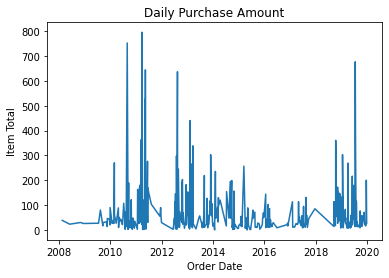

In [62]:
# Plot OrderDate & sum of purchases by date

fig, ax = plt.subplots()
ax.plot(df_DateTotal.index, df_DateTotal.values)
ax.set_xlabel('Order Date')
ax.set_ylabel('Item Total')
ax.set_title('Daily Purchase Amount')
plt.show()

In [30]:
# Use groupby to sum taxes by date

df_DateTax = df_main[['OrderDate', 'Tax']]
df_DateTax = df_DateTax.groupby('OrderDate')
df_DateTax = df_DateTax.sum('Tax')
df_DateTax

,Tax
OrderDate,
2008-02-19,0.00
2008-06-03,0.00
2008-11-06,0.00
2008-12-13,0.00
2009-07-18,0.00
...,...
2019-12-13,1.46
2019-12-14,1.45
2019-12-18,1.79


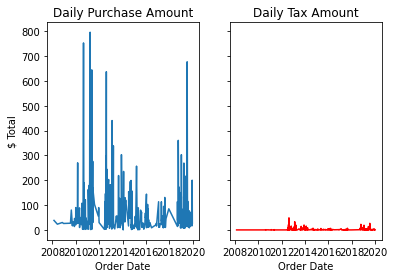

In [31]:
# Plot OrderDate and ItemTotal and OrderDate and PurchasePricePerUnit

fig, ax = plt.subplots(1,2, sharey = True)

ax[0].plot(df_DateTotal.index, df_DateTotal.values)
ax[1].plot(df_DateTax.index, df_DateTax.values, color = 'r')

ax[0].set_xlabel('Order Date')
ax[0].set_ylabel('$ Total')
ax[1].set_xlabel('Order Date')

ax[0].set_title('Daily Purchase Amount')
ax[1].set_title('Daily Tax Amount')

plt.show()

In [32]:
# The previous graphs contained too much data since they were being plotted for each day. 
# Grouping will allow the information to be more legible.

# Purchases by Year 

df_OrderYear = df_main[['OrderDate', 'ItemTotal', 'OrderYear']]
df_OrderYear = df_OrderYear.sort_values('OrderDate')
df_OrderYear = df_OrderYear.groupby('OrderYear')
df_OrderYear = df_OrderYear['ItemTotal'].sum()
print(df_OrderYear)

OrderYear
2008     117.09
2009     456.85
2010    2421.77
2011    7176.93
2012    3651.85
2013    3689.19
2014    2075.99
2015    1257.52
2016     823.48
2017    1392.77
2018    2689.12
2019    4604.85
Name: ItemTotal, dtype: float64


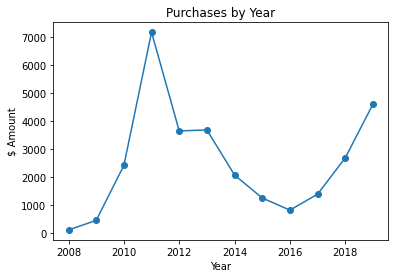

In [33]:
fig,ax = plt.subplots()
ax.plot(df_OrderYear.index, df_OrderYear.values, marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Year')
plt.show()

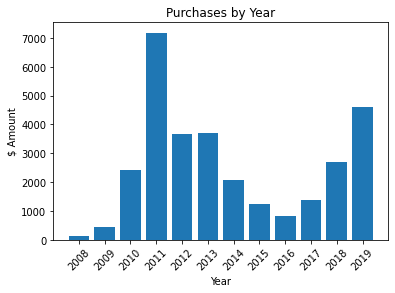

In [34]:
fig,ax = plt.subplots()
ax.bar(df_OrderYear.index, df_OrderYear.values)
ax.set_xlabel('Year')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Year')
plt.xticks([x for x in df_OrderYear.index], rotation = 45)
plt.show()

In [35]:
# Purchases by Month

df_OrderMonth = df_main[['OrderDate', 'ItemTotal', 'OrderMonth']]
df_OrderMonth = df_OrderMonth.sort_values('OrderDate')
df_OrderMonth = df_OrderMonth.groupby('OrderMonth')
df_OrderMonth = df_OrderMonth['ItemTotal'].sum()
df_OrderMonth

OrderMonth
1     1435.93
2     3082.08
3     4439.17
4     1497.22
5     2198.31
6     2042.64
7     3352.54
8     3507.65
9     1887.06
10    2392.95
11    2187.99
12    2333.87
Name: ItemTotal, dtype: float64

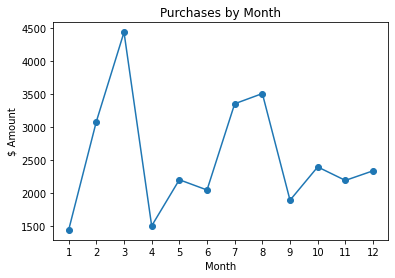

In [36]:
fig, ax = plt.subplots()
ax.plot(df_OrderMonth.index, df_OrderMonth.values, marker = 'o')
ax.set_xlabel('Month')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Month')
plt.xticks([x for x in df_OrderMonth.index])
plt.show()

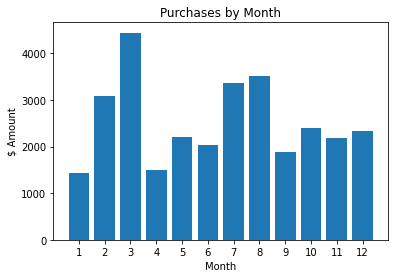

In [37]:
fig, ax = plt.subplots()
ax.bar(df_OrderMonth.index, df_OrderMonth.values)
ax.set_xlabel('Month')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Month')
plt.xticks([x for x in df_OrderMonth.index])
plt.show()

In [38]:
# Transactions by Year

df_TransYear = df_main[['OrderDate', 'ItemTotal', 'OrderYear']]
df_TransYear = df_TransYear.groupby('OrderYear')
df_TransYear = df_TransYear['ItemTotal'].size()
df_TransYear

OrderYear
2008      9
2009     15
2010     83
2011     96
2012     96
2013     89
2014     48
2015     59
2016     36
2017     68
2018     69
2019    113
Name: ItemTotal, dtype: int64

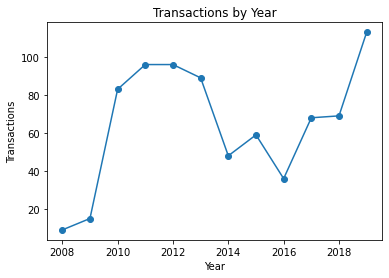

In [39]:
fig,ax = plt.subplots()
ax.plot(df_TransYear.index, df_TransYear.values, marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Transactions')
ax.set_title('Transactions by Year')
plt.show()

In [40]:
# Transactions by Seller

df_TransSeller = df_main[['Seller']]
df_TransSeller = df_TransSeller.groupby(df_TransSeller['Seller'] == 'Amazon')
df_TransSeller = df_TransSeller.size()
df_TransSeller

Seller
False    329
True     452
dtype: int64

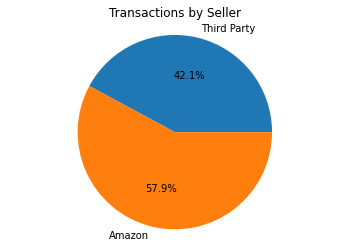

In [41]:
fig,ax = plt.subplots()
ax.pie(df_TransSeller.values, labels = ['Third Party', 'Amazon'], autopct = '%1.1f%%')
ax.set_title('Transactions by Seller')
ax.axis('equal')
plt.show()

<ipython-input-42-2c5bfa80b192>:3: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(


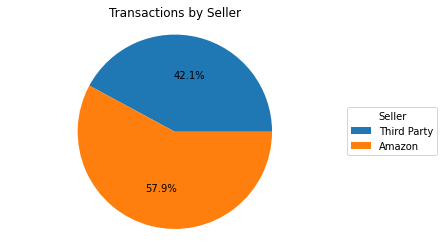

In [42]:
fig, ax = plt.subplots()
ax.pie(df_TransSeller.values, autopct = '%1.1f%%')
ax.legend(
    df_TransSeller.index,
    title = 'Seller',
    labels = ['Third Party', 'Amazon'],
    loc = 'center left',
    bbox_to_anchor = (1,0,0.5,1)
)
ax.set_title('Transactions by Seller')
ax.axis('equal')
plt.show()

In [43]:
# Purchases by Seller

df_PurchasesSeller = df_main[['Seller', 'ItemTotal']]
df_PurchasesSeller = df_PurchasesSeller.groupby(df_PurchasesSeller['Seller'] == 'Amazon')
df_PurchasesSeller = df_PurchasesSeller['ItemTotal'].sum()
df_PurchasesSeller

Seller
False     7575.08
True     22782.33
Name: ItemTotal, dtype: float64

<ipython-input-44-00373a251a9c>:3: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(


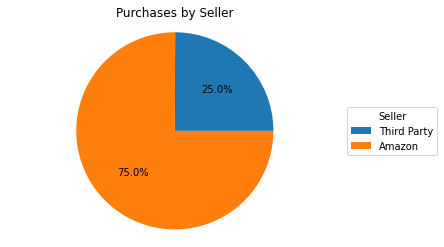

In [44]:
fig,ax = plt.subplots()
ax.pie(df_PurchasesSeller.values, autopct = '%1.1f%%')
ax.legend(
    df_PurchasesSeller.index,
    title = 'Seller',
    labels = ['Third Party', 'Amazon'],
    loc = 'center left',
    bbox_to_anchor = (1,0,0.5,1)    
)
ax.set_title('Purchases by Seller')
ax.axis('equal')
plt.show()

###  Connecting to SQL

In [46]:
# Export df to csv without index
# We will use this csv to import data into MySQL

df_main.to_csv('amazon_purchases_2.csv', index=False)

In [47]:
# dotenv allows us to save passwords in a .env file

from dotenv import load_dotenv

In [48]:
dotenv_local_path = '//.env'
load_dotenv(dotenv_path=dotenv_local_path, verbose=True) 

True

In [49]:
%load_ext dotenv
%dotenv

In [50]:
# sqlalchemy allows us to interact with SQL using Python

import sqlalchemy
from sqlalchemy import create_engine
engine = create_engine('mysql+pymysql://' + os.environ.get("MYSQL_USER") + ":" + os.environ.get("MYSQL_PASSWORD") + '@localhost:3306/amazon')

In [51]:
# Note that Condition must be wrapped in special characters like backticks since Condition is a reserved SQL keyword.

engine.execute("""CREATE TABLE IF NOT EXISTS purchases (
OrderID int not null primary key,
OrderDate date,
Category varchar(50),
`Condition` varchar(50),
Seller varchar(50),
ListPricePerUnit numeric(10,2),
PurchasePricePerUnit numeric(10,2),
Quantity int,
ShipDate date,
Carrier varchar(50),
ItemSubtotal numeric(10,2),
Tax numeric(10,2),
ItemTotal numeric(10,2),
OrderYear int,
OrderMonth int,
OrderDay int);""")

In [52]:
tables = engine.execute('SHOW TABLES')
tables

In [53]:
tables = [x for x in tables]
tables

[('purchases',)]

In [54]:
# Required to parse csv to form insert statements

import csv
from sqlalchemy.sql import text

In [55]:
# Insert rows from amazon_purchases_2.csv into MySQL

with open('amazon_purchases_2.csv') as csv_file:
    input_file = csv.reader(csv_file, delimiter = ',')
    next(input_file) # skip header
    for row in input_file:
        s = text("""
            INSERT IGNORE INTO purchases (
            OrderID,
            OrderDate,
            Category,
            `Condition`,
            Seller,
            ListPricePerUnit,
            PurchasePricePerUnit,
            Quantity,
            ShipDate,
            Carrier,
            ItemSubtotal,
            Tax,
            ItemTotal,
            OrderYear,
            OrderMonth,
            OrderDay
            ) VALUES (
            :OrderID,
            :OrderDate,
            :Category,
            :Condition,
            :Seller,
            :ListPricePerUnit,
            :PurchasePricePerUnit,
            :Quantity,
            :ShipDate,
            :Carrier,
            :ItemSubtotal,
            :Tax,
            :ItemTotal,
            :OrderYear,
            :OrderMonth,
            :OrderDay
            );
        """)
        engine.execute(
        s,
        OrderID = row[0],
        OrderDate = row[1],
        Category = row[2],
        Condition = row[3],
        Seller = row[4],
        ListPricePerUnit = row[5],
        PurchasePricePerUnit = row[6],
        Quantity = row[7],
        ShipDate = row[8],
        Carrier = row[9],
        ItemSubtotal = row[10],
        Tax = row[11],
        ItemTotal = row[12],
        OrderYear = row[13],
        OrderMonth = row[14],
        OrderDay = row[15]
        )

In [56]:
# Confirm data was populated correctly 

purchases = engine.execute('select * from purchases')
for i in purchases:
    print(i)

(1, datetime.date(2008, 2, 19), 'BOOKS', 'unknown', 'Amazon', Decimal('29.99'), Decimal('19.79'), 1, datetime.date(2008, 2, 25), 'USPS', Decimal('19.79'), Decimal('0.00'), Decimal('19.79'), 2008, 2, 19)
(2, datetime.date(2008, 2, 19), 'BOOKS', 'unknown', 'Amazon', Decimal('27.95'), Decimal('18.45'), 1, datetime.date(2008, 2, 25), 'USPS', Decimal('18.45'), Decimal('0.00'), Decimal('18.45'), 2008, 2, 19)
(3, datetime.date(2008, 6, 3), 'BOOKS', 'unknown', 'Amazon', Decimal('34.99'), Decimal('23.09'), 1, datetime.date(2008, 6, 4), 'UPS', Decimal('23.09'), Decimal('0.00'), Decimal('23.09'), 2008, 6, 3)
(4, datetime.date(2008, 11, 6), 'HEALTH_BEAUTY', 'unknown', 'ThirdParty', Decimal('6.99'), Decimal('9.39'), 1, datetime.date(2008, 11, 7), 'USPS', Decimal('9.39'), Decimal('0.00'), Decimal('9.39'), 2008, 11, 6)
(5, datetime.date(2008, 11, 6), 'HEALTH_BEAUTY', 'unknown', 'ThirdParty', Decimal('10.99'), Decimal('7.99'), 1, datetime.date(2008, 11, 7), 'USPS', Decimal('7.99'), Decimal('0.00'), De

In [57]:
# Create dataframe from MySQL table

df_purchases = pd.read_sql("SELECT * FROM purchases", con=engine)
df_purchases

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal,OrderYear,OrderMonth,OrderDay
0,1,2008-02-19,BOOKS,unknown,Amazon,29.99,19.79,1,2008-02-25,USPS,19.79,0.00,19.79,2008,2,19
1,2,2008-02-19,BOOKS,unknown,Amazon,27.95,18.45,1,2008-02-25,USPS,18.45,0.00,18.45,2008,2,19
2,3,2008-06-03,BOOKS,unknown,Amazon,34.99,23.09,1,2008-06-04,UPS,23.09,0.00,23.09,2008,6,3
3,4,2008-11-06,HEALTH_BEAUTY,unknown,ThirdParty,6.99,9.39,1,2008-11-07,USPS,9.39,0.00,9.39,2008,11,6
4,5,2008-11-06,HEALTH_BEAUTY,unknown,ThirdParty,10.99,7.99,1,2008-11-07,USPS,7.99,0.00,7.99,2008,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,970,2019-12-14,COMPUTER,new,Amazon,44.99,21.88,1,2019-12-15,USPS,21.88,1.45,23.33,2019,12,14
777,971,2019-12-18,OTHER,new,ThirdParty,19.99,13.99,1,2019-12-19,AMZN,13.99,0.93,14.92,2019,12,18
778,972,2019-12-18,OTHER,new,ThirdParty,27.00,12.99,1,2019-12-19,AMZN,12.99,0.86,13.85,2019,12,18
779,973,2019-12-19,GIFT_CARD,new,Amazon,50.00,200.00,1,2019-12-19,Other,200.00,0.00,200.00,2019,12,19


### Data Analysis using SQL

In [70]:
# Cumulative total spent from 2008-2019, inclusive

TotalSpent = engine.execute('SELECT sum(ItemTotal) FROM purchases')
TotalSpent = [row for row in TotalSpent]
TotalSpent

[(Decimal('30357.41'),)]

In [71]:
# Use groupby to sum purchases by date

OrderDate_ItemTotal = engine.execute('SELECT OrderDate, sum(ItemTotal) FROM purchases GROUP BY OrderDate')
OrderDate_ItemTotal = [row for row in OrderDate_ItemTotal]
df_OrderDate_ItemTotal = pd.DataFrame.from_records(OrderDate_ItemTotal)
df_OrderDate_ItemTotal.columns = ['OrderDate', 'ItemTotal']
df_OrderDate_ItemTotal

,OrderDate,ItemTotal
0,2008-02-19,38.24
1,2008-06-03,23.09
2,2008-11-06,29.86
3,2008-12-13,25.90
4,2009-07-18,26.97
...,...,...
440,2019-12-13,23.45
441,2019-12-14,23.33
442,2019-12-18,28.77
443,2019-12-19,200.00


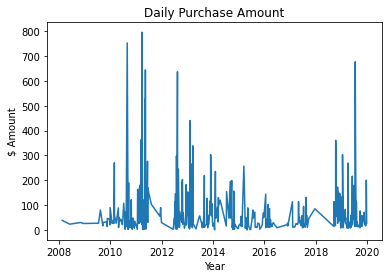

In [72]:
# Plot OrderDate & sum of purchases by date

fig, ax = plt.subplots()
ax.plot(df_OrderDate_ItemTotal['OrderDate'], df_OrderDate_ItemTotal['ItemTotal'])
ax.set_xlabel('Year')
ax.set_ylabel('$ Amount')
ax.set_title('Daily Purchase Amount')
plt.show()

In [87]:
# Spending by Category

df_Category = df_main[['Category', 'ItemTotal']]
df_Category = df_Category.groupby('Category')
df_Category = df_Category.sum('ItemTotal')
df_Category

,ItemTotal
Category,
ABIS_BOOK,$19.79 $18.45 $23.09 $10.33 $15.57 $16.47 $12....
ABIS_DOWNLOADABLE_SOFTWARE,$0.00
ABIS_DRUGSTORE,$0.76
ABIS_DVD,$2.89
ABIS_ELECTRONICS,$1.87
...,...
UNDERWEAR,$17.98 $17.98 $17.98
VITAMIN,$7.99 $9.21 $9.77 $7.79 $21.95 $8.49
WATCH,$10.78 $27.35 $11.40 $19.99
